In [6]:
# This code produces the contour maps
# For any optimization routine
# Taken from: http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from autograd import elementwise_grad, value_and_grad
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial
import pickle as pkl

Functional value at (1.,1.):  0.0


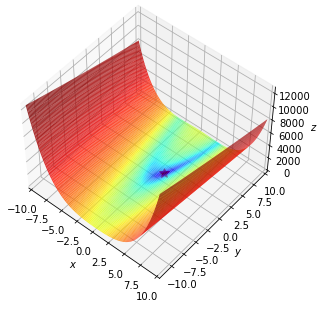

In [7]:
# Let's define the plot for this
# For this, we need the function 'f'
f  = lambda x, y: (1. - x)**2 + (y - x**2)**2

# The gradient of the function
# First we define the boundaries of the plot, with grit
xmin, xmax, xstep = -10, 10., .2
ymin, ymax, ystep = -12, 10, .2

# Then we define the mesh for the grid
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

# We then define the functional value
z = f(x, y)

# We know the minima lies on (1.,1.)
minima = np.array([1., 1.])

# Check if that's the case
print('Functional value at (1.,1.): ', f(*minima))


# Now, let's plot the graph and see how it looks
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima, f(*minima), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

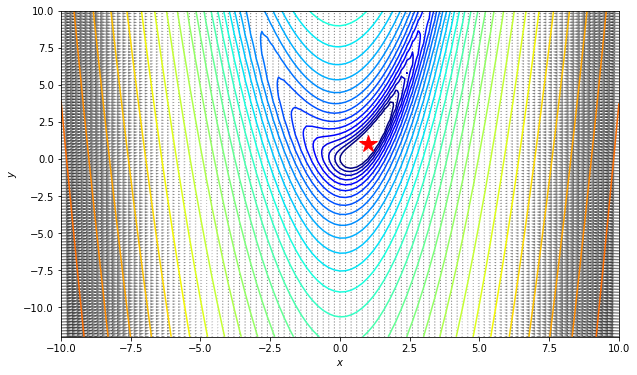

In [8]:
# Now we need to define the gradients for the 2-D plots
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

# Let's see how the plot looks with the gradients
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [9]:
# Let's load all the data that we saved from the optimization scheme designed
with open('./rosenbrockresults/raw/path.pkl', 'rb') as handle:
    path = np.array(pkl.load(handle)).T
    
# The shape of the array has to be n columns and 2 rows
print(path.shape)

(2, 41)


In [10]:
print(path)

[[ 1.         -6.656103   -5.5303364  -5.168813   -2.837221   -2.0165212
  -1.8613541  -1.8380929  -2.6104088  -2.5797477   0.37338376  0.37375817
   1.0464906   1.0459825   1.0000051   1.0000015   1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.        ]
 [ 1.          6.660717    5.4571576   4.695054    3.9172955   3.6340783
   3.4266005   3.3842864   6.2246885   6.6540923  -8.581507    0.14008045
   0.642548    1.0940788   0.9978964   1.000003    1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.        ]]


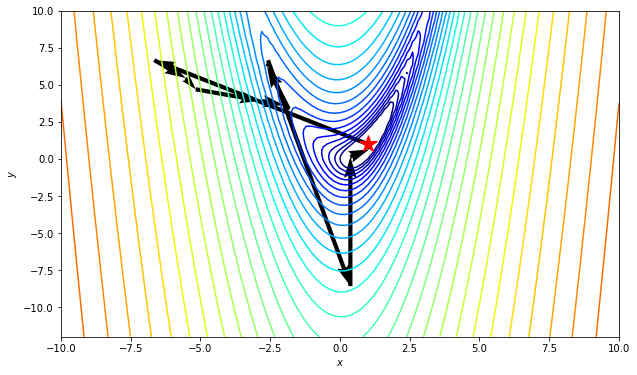

In [11]:
# Now let's look at the static plot of the iterates
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.plot(*minima, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.savefig('./rosenbrockresults/images/rosenbrockmu1e-10')

plt.show()

In [12]:
# Let's compute the element-wise grad to see how the gradients at each
# grit point looks like
dz_dx = elementwise_grad(f, argnum=0)(x, y)
dz_dy = elementwise_grad(f, argnum=1)(x, y)

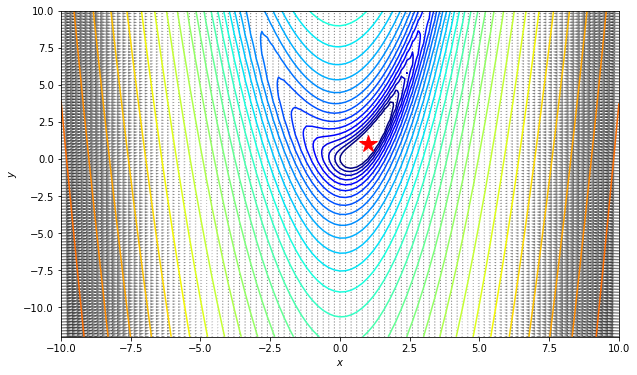

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

In [14]:
# Now let's animate what the iterates look like

# First we define a line and point object
line, = ax.plot([], [], 'b', label='Newton interior point method', lw=2)
point, = ax.plot([], [], 'bo')

# Initializing the lines and points
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

# Defining the function to animate these points
def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [15]:
# Animate!
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=path.shape[1], interval=60, 
                               repeat_delay=5, blit=True)

In [17]:
HTML(anim.to_html5_video())

In [19]:
writervideo = animation.FFMpegWriter(fps=60)
anim.save('./rosenbrockresults/videos/rosenbrockmu1e-10.mp4', writer=writervideo)